# Data Access with Zipline

Zipline is the algorithmic trading library that used to power the now-defunct Quantopian backtesting and live-trading platform. It is also available offline to develop a strategy using a limited number of free data bundles that can be ingested and used to test the performance of trading ideas.

## Zipline installation

> This notebook requires the `conda` environment `backtest`. Please see the [installation instructions](../installation/README.md) for running the latest Docker image or alternative ways to set up your environment.

There is much more information about Zipline in [Chapter 8](../../08_ml4t_workflow/04_ml4t_workflow_with_zipline).

## Imports & Settings

In [19]:
%matplotlib inline
import pandas as pd

In [20]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


## zipline Demo

In [21]:
from zipline.examples import buyapple
buyapple??

In [22]:
from zipline.api import order, record, symbol


def initialize(context):
    pass


def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))
    

### Ingest Data

Get QUANDL API key and follow instructions to download zipline bundles [here](https://zipline.ml4trading.io/bundles.html). This boils down to running:

In [23]:
%env QUANDL_API_KEY = "yGe56CBmpf1sucMhBHg8" 

env: QUANDL_API_KEY="yGe56CBmpf1sucMhBHg8"


In [24]:
import os   

os.environ["QUANDL_API_KEY"] = "yGe56CBmpf1sucMhBHg8"

QUANDL_API_KEY=os.getenv('QUANDL_API_KEY')

key = 'QUANDL_API_KEY'

value = os.getenv(key)

print("Value of 'QUANDL_API_KEY' environment variable :", value)

Value of 'QUANDL_API_KEY' environment variable : yGe56CBmpf1sucMhBHg8


In [8]:
# !zipline ingest

See `zipline` [docs](https://zipline.ml4trading.io/bundles.html) on the download and management of data bundles used to simulate backtests. 

The following commandline instruction lists the available bundles (store per default in `~/.zipline`. 

In [9]:
# !zipline bundles

In [25]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [2]:
%%zipline --start 2016-1-1 --end 2018-1-1
from zipline.api import symbol, order, record

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10) #在这种情况下，我们希望在每次迭代中订购 10 股 Apple。
    record(AAPL=data[symbol('AAPL')].price)

_.head()

#run首先调用该initialize()函数，然后通过handle_data(). 
#每次call后，handle_data()我们都会指示zipline订购 10 股 AAPL 股票。
#order()函数调用后，zipline 在订单簿中输入订购的库存和数量。handle_data()函数完成后，查找 zipline任何未结订单并尝试填写它们。

### Data access using zipline

The following code illustrates how zipline permits us to access daily stock data for a range of companies. You can run zipline scripts in the Jupyter Notebook using the magic function of the same name.

First, you need to initialize the context with the desired security symbols. We'll also use a counter variable. Then zipline calls handle_data, where we use the `data.history()` method to look back a single period and append the data for the last day to a .csv file:

In [17]:
%env QUANDL_API_KEY = "yGe56CBmpf1sucMhBHg8" 

env: QUANDL_API_KEY="yGe56CBmpf1sucMhBHg8"


In [5]:
%%zipline --start 2010-1-1 --end 2018-1-1 --data-frequency daily --no-benchmark
from zipline.api import order_target, record, symbol
import pandas as pd

def initialize(context):
    context.i = 0
    context.assets = [symbol('FB'), symbol('GOOG'), symbol('AMZN')]
    
def handle_data(context, data):
    df = data.history(context.assets, fields=['price', 'volume'], bar_count=1, frequency="1d")
    df = df.reset_index()
    
    if context.i == 0:
        df.columns = ['date', 'asset', 'price', 'volume']
        df.to_csv('stock_data.csv', index=False)
    else:
        df.to_csv('stock_data.csv', index=False, mode='a', header=None)
        #mode=‘a’：即向csv文件追加数据，按行追加（如果不存在这个csv文件，则创建一个并添加数据）
    context.i += 1

/home/stefan/.pyenv/versions/miniconda3-latest/envs/ml4t-zipline/lib/python3.5/site-packages/empyrical/stats.py:711: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/home/stefan/.pyenv/versions/miniconda3-latest/envs/ml4t-zipline/lib/python3.5/site-packages/empyrical/stats.py:797: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,0.0,NaN,0.002012,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,0.0,0.0,NaN,0.004029,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,0.0,0.0,NaN,0.006049,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,0.0,0.0,NaN,0.008073,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,0.0,0.0,NaN,0.010102,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,0.0,0.0,NaN,0.012134,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,0.0,0.0,NaN,0.014171,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,0.0,0.0,NaN,0.016212,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,0.0,0.0,NaN,0.018257,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,0.0,0.0,NaN,0.020306,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


We can plot the data as follows:

asset
Equity(1037 [FB])      AxesSubplot(0.125,0.2;0.775x0.68)
Equity(1244 [GOOG])    AxesSubplot(0.125,0.2;0.775x0.68)
Equity(167 [AMZN])     AxesSubplot(0.125,0.2;0.775x0.68)
Name: price, dtype: object

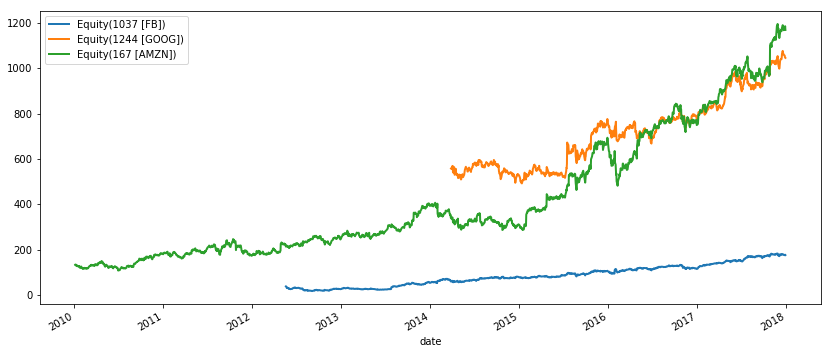

In [6]:
df = pd.read_csv('stock_data.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date').groupby('asset').price.plot(lw=2, legend=True, figsize=(14, 6))